# Load dataset

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
dfConfirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
dfDeath = pd.read_csv("time_series_covid19_deaths_global.csv")
dfRecovered = pd.read_csv("time_series_covid19_recovered_global.csv")

#rename columns
dfConfirmed.rename(columns={'Province/State': 'province', 'Country/Region': 'country'}, inplace=True)
dfDeath.rename(columns={'Province/State': 'province', 'Country/Region': 'country'}, inplace=True)
dfRecovered.rename(columns={'Province/State': 'province', 'Country/Region': 'country'}, inplace=True)


In [102]:
for i in dfConfirmed.country:
    print(i)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Australia
Australia
Australia
Australia
Australia
Australia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei
Bulgaria
Burkina Faso
Cabo Verde
Cambodia
Cameroon
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Central African Republic
Chad
Chile
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Diamond Princess
Cuba
Cyprus
Czechia
Denmark
Denmark
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
France
France
France
France
France
France
France
France
France
Gabon
Gambia
Georgi

In [104]:
nl = dfConfirmed[dfConfirmed.country == 'Netherlands']
nl

,province,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
166,Aruba,Netherlands,12.5186,-70.0358,0,0,0,0,0,0,...,4,5,5,9,9,12,17,28,33,46
167,Curacao,Netherlands,12.1696,-68.9900,0,0,0,0,0,0,...,3,3,3,3,4,6,6,6,8,8
168,Sint Maarten,Netherlands,18.0425,-63.0548,0,0,0,0,0,0,...,0,1,1,1,2,2,3,3,3,3
169,NaN,Netherlands,52.1326,5.2913,0,0,0,0,0,0,...,2460,2994,3631,4204,4749,5560,6412,7431,8603,9762


# Data visualization on dummy dataset

In [95]:
dfConfirmed.country

0                 Afghanistan
1                     Albania
2                     Algeria
3                     Andorra
4                      Angola
5         Antigua and Barbuda
6                   Argentina
7                     Armenia
8                   Australia
9                   Australia
10                  Australia
11                  Australia
12                  Australia
13                  Australia
14                  Australia
15                  Australia
16                    Austria
17                 Azerbaijan
18                    Bahamas
19                    Bahrain
20                 Bangladesh
21                   Barbados
22                    Belarus
23                    Belgium
24                      Benin
25                     Bhutan
26                    Bolivia
27     Bosnia and Herzegovina
28                     Brazil
29                     Brunei
                ...          
223            United Kingdom
224                   Uruguay
225       

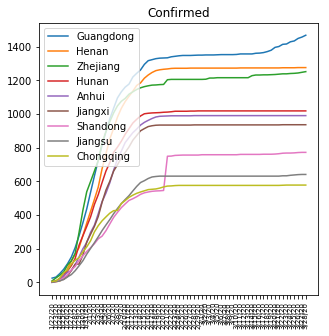

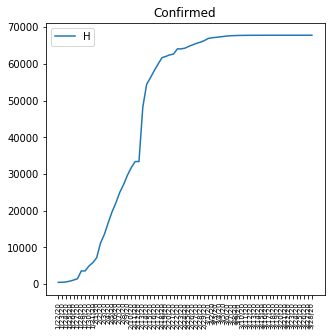

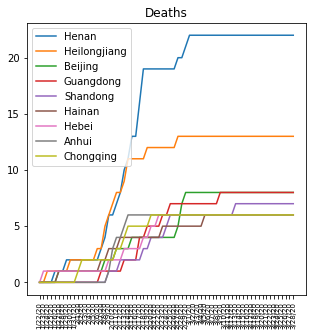

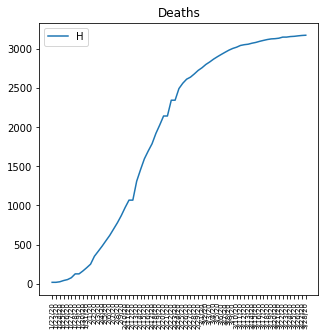

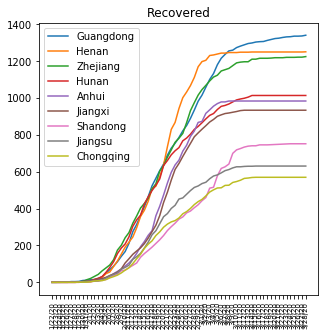

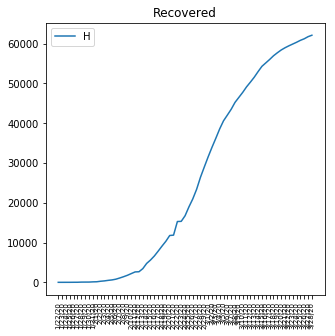

In [98]:
def selectCountry(countryName,df):
    df = df.loc[df['country'] == countryName]
    df = df.drop(['Lat','Long','country'], axis=1)
    df = df.set_index('province').T
    sortedProvinces = df.max().sort_values(ascending=False).index
    return sortedProvinces,df

def plot_regions(df,plotted_columns,title): 
    fig,ax = plt.subplots(figsize=[5,5])
    lineObjects = ax.plot(df[plotted_columns]);
    plt.xticks(fontsize=7,rotation=90)
    plt.legend(iter(lineObjects), (plotted_columns))
    plt.title(title)
    plt.show();
    
datasets = [dfConfirmed, dfDeath, dfRecovered]
countries = ['China']
provinces,dfs = [],[]

for country in countries:
    for dataset in datasets:       
        provinces.append(selectCountry(country, dataset)[0])
        dfs.append(selectCountry(country, dataset)[1])

for i in range(len(dfs)):
    plot_regions(dfs[i],provinces[i][1:10],titles[i])
    plot_regions(dfs[i],provinces[i][0],titles[i])

In [90]:
provinces

[Index(['Hubei', 'Guangdong', 'Henan', 'Zhejiang', 'Hunan', 'Anhui', 'Jiangxi',
        'Shandong', 'Jiangsu', 'Chongqing', 'Beijing', 'Hong Kong', 'Sichuan',
        'Shanghai', 'Heilongjiang', 'Fujian', 'Hebei', 'Guangxi', 'Shaanxi',
        'Yunnan', 'Hainan', 'Tianjin', 'Guizhou', 'Gansu', 'Shanxi', 'Liaoning',
        'Jilin', 'Inner Mongolia', 'Xinjiang', 'Ningxia', 'Macau', 'Qinghai',
        'Tibet'],
       dtype='object', name='province'),
 Index(['Hubei', 'Henan', 'Heilongjiang', 'Beijing', 'Guangdong', 'Shandong',
        'Hainan', 'Hebei', 'Anhui', 'Chongqing', 'Shanghai', 'Hunan',
        'Hong Kong', 'Shaanxi', 'Sichuan', 'Tianjin', 'Xinjiang', 'Liaoning',
        'Guangxi', 'Guizhou', 'Yunnan', 'Gansu', 'Fujian', 'Zhejiang',
        'Inner Mongolia', 'Jiangxi', 'Jilin', 'Macau', 'Ningxia', 'Qinghai',
        'Shanxi', 'Tibet', 'Jiangsu'],
       dtype='object', name='province'),
 Index(['Hubei', 'Guangdong', 'Henan', 'Zhejiang', 'Hunan', 'Anhui', 'Jiangxi',
        'Sha

In [278]:
print("provDeath: {},\n\n provDeath: {},\n\n provRec: {}".format(provDeath,provDeath,provRec))

provDeath: Index(['Hubei', 'Henan', 'Heilongjiang', 'Beijing', 'Guangdong', 'Shandong',
       'Hainan', 'Hebei', 'Anhui', 'Chongqing', 'Shanghai', 'Hunan',
       'Hong Kong', 'Shaanxi', 'Sichuan', 'Tianjin', 'Xinjiang', 'Liaoning',
       'Guangxi', 'Guizhou', 'Yunnan', 'Gansu', 'Fujian', 'Zhejiang',
       'Inner Mongolia', 'Jiangxi', 'Jilin', 'Macau', 'Ningxia', 'Qinghai',
       'Shanxi', 'Tibet', 'Jiangsu'],
      dtype='object', name='Province/State'),

 provDeath: Index(['Hubei', 'Henan', 'Heilongjiang', 'Beijing', 'Guangdong', 'Shandong',
       'Hainan', 'Hebei', 'Anhui', 'Chongqing', 'Shanghai', 'Hunan',
       'Hong Kong', 'Shaanxi', 'Sichuan', 'Tianjin', 'Xinjiang', 'Liaoning',
       'Guangxi', 'Guizhou', 'Yunnan', 'Gansu', 'Fujian', 'Zhejiang',
       'Inner Mongolia', 'Jiangxi', 'Jilin', 'Macau', 'Ningxia', 'Qinghai',
       'Shanxi', 'Tibet', 'Jiangsu'],
      dtype='object', name='Province/State'),

 provRec: Index(['Hubei', 'Guangdong', 'Henan', 'Zhejiang', 'Hunan', 

In [5]:
dfConfirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,22,24,24,40,40,74,84,94,110,110
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,64,70,76,89,104,123,146,174,186,197
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,87,90,139,201,230,264,302,367,409,454
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,53,75,88,113,133,164,188,224,267,308
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,1,2,2,3,3,3,4,4,5
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,1,1,1,1,3,3,3,7,7,7
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,97,128,158,266,301,387,387,502,589,690
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,115,136,160,194,235,249,265,290,329,407
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,4,6,9,19,32,39,39,53,62,71
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,307,353,436,669,669,818,1029,1219,1405,1617


# Experiments

##### Plot confirmed per country

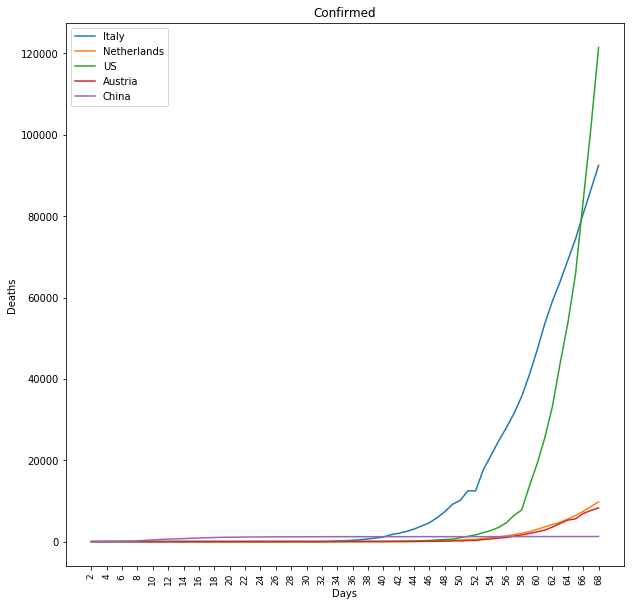

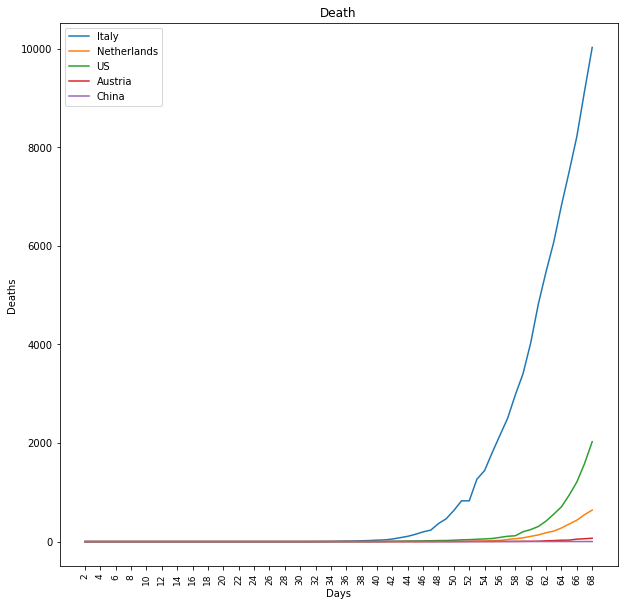

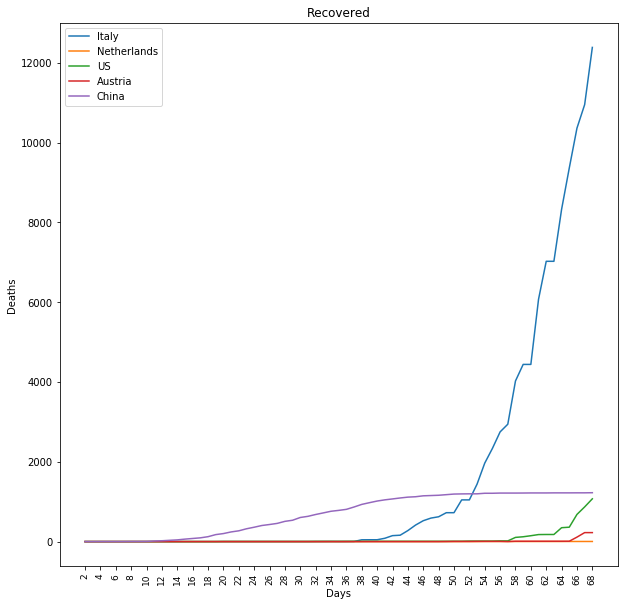

In [324]:
def plot_days(df,countryname,title):
    country = df[df.country == countryname]
    country = country.drop(country.columns[0:4], axis=1) #only keep days
    if len(country) > 1:
        country.drop(country.head(len(country)-1).index,inplace=True) #drop first n rows
    country = country.T
    
    plt.plot(country.index,country,label=countryname)
    plt.xticks(xticks,(str(i) for i in range(1,len(nl)+2) if i%2 == 0),rotation=90,fontsize=9);
    plt.xlabel("Days")
    plt.ylabel("Deaths")
    plt.title(title)
    plt.legend()
    plt.savefig(title+'.png')
    return country
    
countries = ['Italy', 'Netherlands', 'US','Austria','China']
datasets = [dfConfirmed, dfDeath, dfRecovered]
titles = ['Confirmed', 'Death', 'Recovered']

for i in range(len(datasets)): 
    fig,ax=plt.subplots(figsize=[10,10])
    for k in countries: 
         plot_days(datasets[i],k,titles[i]);
